#                     <t/>         Quora Similar Question Pair --- by Smriti Pradhan

### <u> Problem Statement: </u>

#### There are many people who ask the same questions in quora .<br>So to reduce the time to write again and again the answer to similar question becomes tedious.
1.Identify the Questions asked on Quora are the duplicates of the Question already asked. <br>

2.Task is to predict whether the question asked are duplicates or not.<br>



## Constraints

1.The cost of misinterpretation can be high. <br>
2.There is no strict latency.(ie. we do not need Output in few seconds.)<br>
3.Partially Interpretable. (Interpretability means the reason why the machine said yes or no).<br>
4.We need a probability of a question pair so that we can choose any threshold.<br>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Importing the Training Data
data = pd.read_csv("train.csv")

In [3]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.tail(5)

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### #Observation -- 

Total Number of Data points  --- 404290  <br>


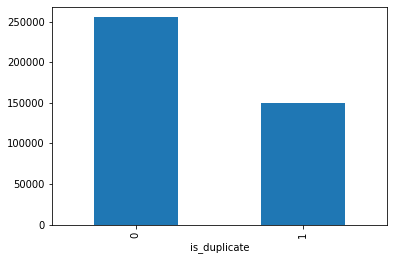

In [6]:
data.groupby("is_duplicate")['id'].count().plot.bar()

In [7]:
data.groupby("is_duplicate")['id'].count()

is_duplicate
0    255027
1    149263
Name: id, dtype: int64

### Observation --

In [8]:
print('Percentage of Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(data['is_duplicate'].mean()*100, 2)))
print('\nPercentage of Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

Percentage of Question pairs are not Similar (is_duplicate = 0):
   63.08%

Percentage of Question pairs are Similar (is_duplicate = 1):
   36.92%


## Number of Unique Questions in the dataset

In [9]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
#print(qids) both the qid1 and qid2
unique_ques = len(np.unique(qids))
print("The number of unique questions => ",unique_ques)


qs_morethan_onetime = np.sum(qids.value_counts() > 1) #the unique question repeating more than one time counts

The number of unique questions =>  537933


In [10]:
print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_ques*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



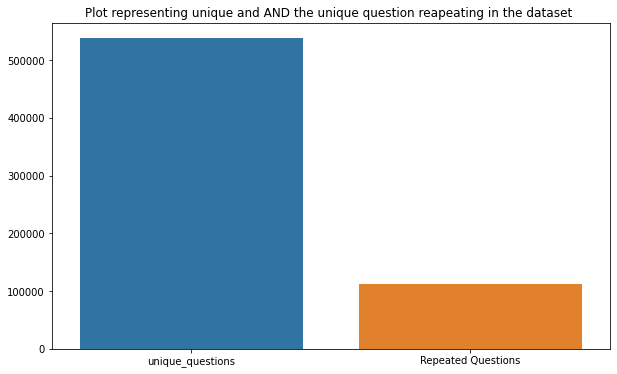

In [11]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_ques , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and AND the unique question reapeating in the dataset ")
sns.barplot(x,y)
plt.show()

## Frequency of Questions occuring

Maximum number of times a single question is repeated: 157



Text(0, 0.5, 'Number of questions')

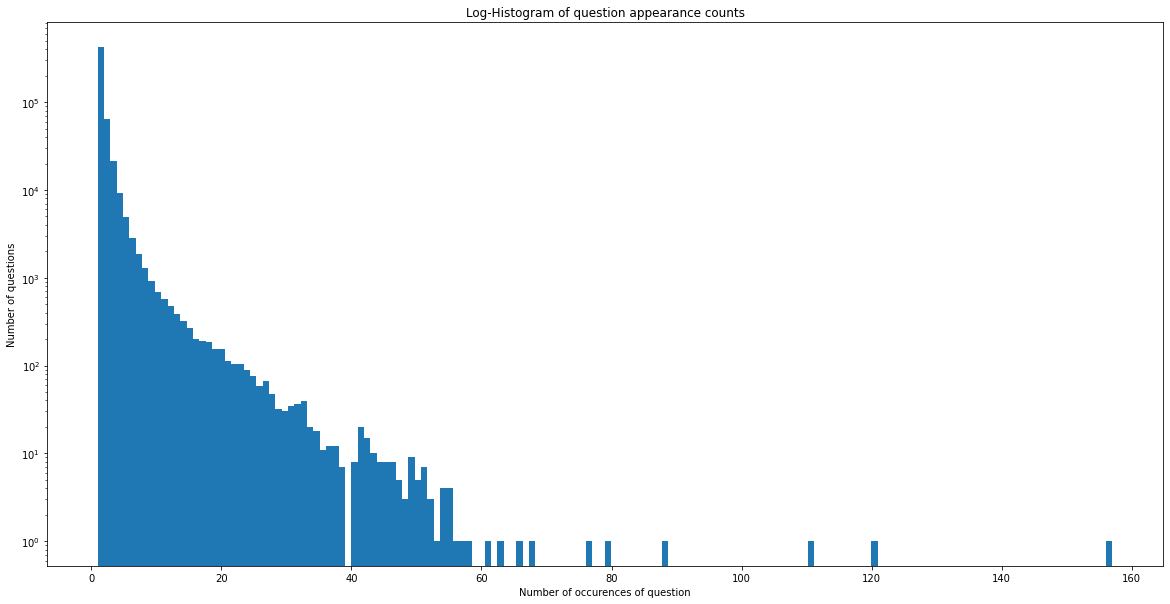

In [12]:
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')


# qid.value_count

In [13]:
print(qids.value_counts().head(5))

2559     157
30782    120
4044     111
2561      88
14376     79
dtype: int64


### Observation:
#### 1.qid is the combo of qid1+qid2 .So,number of times the question with qid 2559 repeating is ==>  157 
#### 2.Many questions have occured few number of times
#### 3.Few questions have appeared many time.
#### 4.Maximum Number of time a qid repeated is => 157

In [14]:
#Checking whether there are any rows with null values
nan_rows = data[data.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [15]:
# Filling the null values with ''
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [16]:
#Again checking for the Null Values
nan_rows = data[data.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# Basic Feature Extraction

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 


____freq_qid1 = Frequency of qid1's (Number of Times the question has appeared in the total dataset)____<br>
____freq_qid2 = Frequency of qid2's (Number of times the question has appeared in the total dataset)____



In [17]:
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')

In [18]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1


____q1len = Length of q1____<br>
____q2len = Length of q2____

In [19]:
data['q1len'] = data['question1'].str.len() 
data['q2len'] = data['question2'].str.len()

___q1_n_words = Number of words in Question 1___ <br>
___q2_n_words = Number of words in Question 2___

In [20]:
data['q1_n_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
data['q2_n_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

___word_Common: Number of Common Unqiue words in Question1 and Question2___

In [22]:
def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    #print(w1)
    return 1.0 * len(w1 & w2)

data['word_Common'] = data.apply(normalized_word_Common, axis=1)

____word_Total: Total Number of unique words in question 1 + Total no of unique words in question 2___

In [23]:
 def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    
        
        return 1.0 * (len(w1) + len(w2))
data['word_Total'] = data.apply(normalized_word_Total, axis=1)

__word_share__ : Common words/Total words

In [24]:
def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
data['word_share'] = data.apply(normalized_word_share, axis=1)

In [25]:
data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])

In [31]:
import os

In [32]:
if os.path.isfile('data_feature_en_wo_preprocessing.csv'):
    data = pd.read_csv("data_feature_en_wo_preprocessing.csv",encoding='latin-1')
else:
    data.to_csv("data_feature_en_wo_preprocessing.csv", index=False)

## Results: